In [55]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [56]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        # Initialize weights and biases for two layers
        self.weights_1 = np.random.randn()  # Weights from input to hidden layer
        self.bias_1 = np.random.randn()  # Biases for hidden layer

        self.weights_2 = np.random.randn()  # Weights from hidden layer to output layer
        self.bias_2 = np.random.randn()  # Bias for output layer

        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        # Forward pass through first layer (input -> hidden)
        layer_1_input = np.dot(input_vector, self.weights_1) + self.bias_1
        layer_1_output = self._sigmoid(layer_1_input)

        # Forward pass through second layer (hidden -> output)
        layer_2_input = np.dot(layer_1_output, self.weights_2) + self.bias_2
        layer_2_output = self._sigmoid(layer_2_input)

        return layer_2_output

    def _compute_gradients(self, input_vector, target):
        # Forward pass
        layer_1_input = np.dot(input_vector, self.weights_1) + self.bias_1
        layer_1_output = self._sigmoid(layer_1_input)

        layer_2_input = np.dot(layer_1_output, self.weights_2) + self.bias_2
        prediction = self._sigmoid(layer_2_input)

        # Backward pass (output -> hidden)
        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer2_input = self._sigmoid_deriv(layer_2_input)

        dlayer2_input_dweights_2 = layer_1_output
        dlayer2_input_dbias_2 = 1

        derror_dweights_2 = derror_dprediction * dprediction_dlayer2_input * dlayer2_input_dweights_2
        derror_dbias_2 = derror_dprediction * dprediction_dlayer2_input * dlayer2_input_dbias_2

        # Backward pass (hidden -> input)
        dlayer2_input_dlayer1_output = self.weights_2
        derror_dlayer1_output = derror_dprediction * dprediction_dlayer2_input * dlayer2_input_dlayer1_output
        dlayer1_output_dlayer1_input = self._sigmoid_deriv(layer_1_input)

        dlayer1_input_dweights_1 = input_vector
        dlayer1_input_dbias_1 = 1

        derror_dweights_1 = np.outer(dlayer1_input_dweights_1, derror_dlayer1_output * dlayer1_output_dlayer1_input)
        derror_dbias_1 = derror_dlayer1_output * dlayer1_output_dlayer1_input * dlayer1_input_dbias_1

        return derror_dbias_1, derror_dweights_1, derror_dbias_2, derror_dweights_2

    def _update_parameters(self, derror_dbias_1, derror_dweights_1, derror_dbias_2, derror_dweights_2):
        # Update first layer parameters
        self.bias_1 -= derror_dbias_1 * self.learning_rate
        self.weights_1 -= derror_dweights_1 * self.learning_rate

        # Update second layer parameters
        self.bias_2 -= derror_dbias_2 * self.learning_rate
        self.weights_2 -= derror_dweights_2 * self.learning_rate

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients
            derror_dbias_1, derror_dweights_1, derror_dbias_2, derror_dweights_2 = self._compute_gradients(
                input_vector, target
            )

            # Update the weights and biases
            self._update_parameters(derror_dbias_1, derror_dweights_1, derror_dbias_2, derror_dweights_2)

            # Measure the cumulative error
            if current_iteration % 100 == 0:
                cumulative_error = 0
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)
                    cumulative_error += error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

In [22]:
fulldata = np.loadtxt('dists-energies/combineddata.dat')
fullx = fulldata.T[0]
fully = fulldata.T[1]
zero=np.min(fully)
#zero=fully[-1]
# manipulate data like minmax
fullynew = fully - zero
fullxnew = fullx
#scaling
scaley=np.max(fullynew)
scalex=np.max(fullxnew)
fullynew=fullynew/scaley
fullxnew=fullxnew/scalex

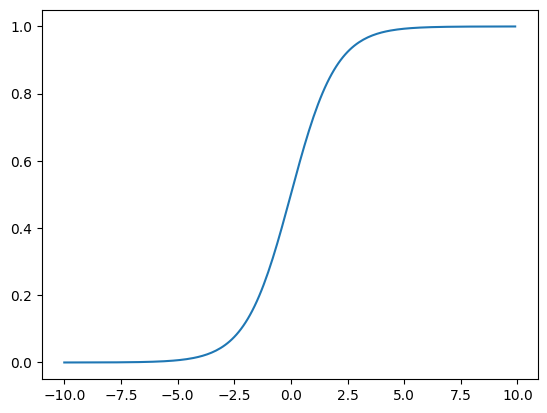

In [23]:
xgrid=np.arange(-10,10,0.1)
a=[1/(1 + np.exp(-x)) for x in xgrid]
plt.plot(xgrid, a)
plt.show()

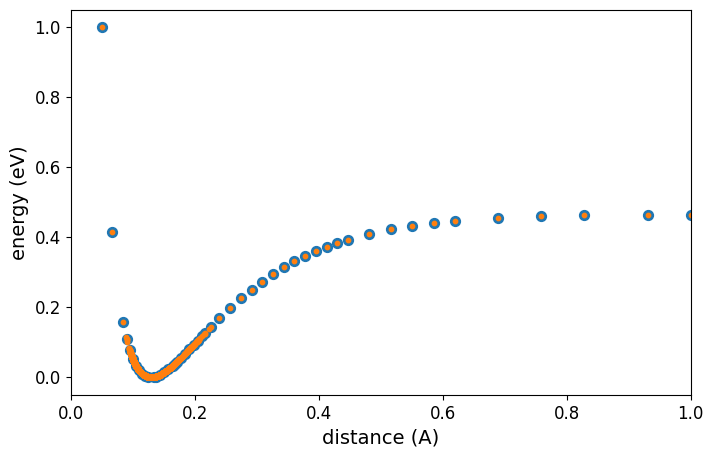

In [24]:
def simple_fps(datax, nsamples):
    n=len(datax)
    distances=np.zeros(n)
    sampled=np.zeros((nsamples,), dtype=int)
    distances[:]=1e10
    index=np.random.choice(1, 1, replace=False)
    sampled[0]=index
    for i in range(nsamples):
        for j in range(n):
            dist=np.abs(datax[j]-datax[index])
            if dist <= distances[j]:
                distances[j]=dist
        index=np.argmax(distances)
        # print(index)
        sampled[i]=index
    return sampled

nsamples = 50
# Check if nsamples is not greater than the length of the array
if nsamples > len(fullxnew):
    raise ValueError("nsamples cannot be greater than the length of the array.")
# Call fps
indices = simple_fps(fullxnew, nsamples)
# print(indices)
# Select items from your array using these indices
selected_x_fps = fullxnew[indices]
selected_y_fps = fullynew[indices]
#x_values = np.array([0, 0.3, 1, 3.1, 4.7])
#y_values = np.array([1, 0, 1.4, 0, -0.9])
x_values=selected_x_fps
y_values=selected_y_fps
plt.figure(figsize=(8, 5))
plt.xlim([0.0,1])
plt.ylabel('energy (eV)', fontsize=14)
plt.xlabel('distance (A)', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(x_values, y_values, marker='o', s=50)
plt.scatter(fullxnew, fullynew, marker='o', s=10)
plt.show()

In [57]:
input_vectors = selected_x_fps[:,np.newaxis]
targets = selected_y_fps[:,np.newaxis]
learning_rate = 0.1
epochs=60000
neural_network1 = NeuralNetwork(learning_rate)
training_error_lr1 = neural_network1.train(input_vectors, targets, epochs)
learning_rate = 0.05
neural_network2 = NeuralNetwork(learning_rate)
training_error_lr2 = neural_network2.train(input_vectors, targets, epochs)
learning_rate = 0.01
neural_network3 = NeuralNetwork(learning_rate)
training_error_lr3 = neural_network3.train(input_vectors, targets, epochs)

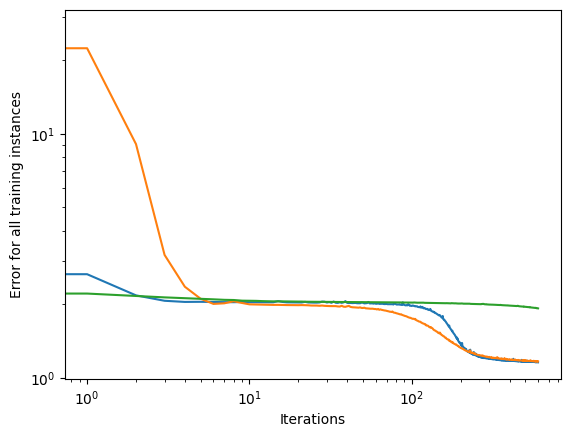

In [58]:
plt.plot(training_error_lr1)
plt.plot(training_error_lr2)
plt.plot(training_error_lr3)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.yscale('log')
plt.xscale('log')
#plt.xlim(2, 100)
#plt.ylim(0,90000)
plt.show()

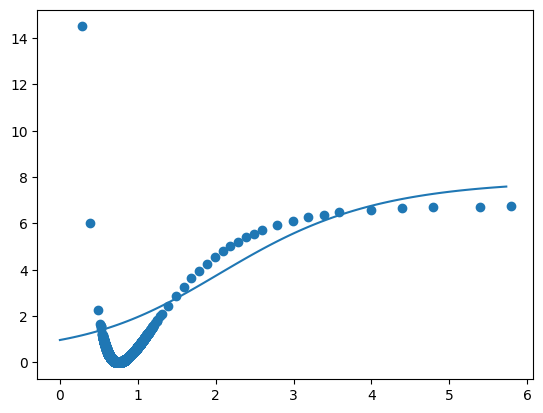

In [61]:
xgrid=np.arange(0,1,0.01)
ypredict=np.array([neural_network2.predict(x) for x in xgrid])
xgrid=xgrid*scalex
ypredict=ypredict*scaley
plt.plot(xgrid,ypredict)
plt.scatter(fullx, fully-zero)
plt.show()